In [1]:
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

# Import the load_data function from your custom module
from data_processing import load_data 


# Define paths
zip_file_path = '../Data/raw_analyst_ratings.csv.zip'  # Path to the .zip file
extracted_folder_path = '../Data'  # Path where the files will be extracted

In [2]:
# Load the dataset to the dataframe
df = load_data(zip_file_path, 'raw_analyst_ratings.csv')

In [3]:
# explore the the first 5 rows
df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A


In [4]:
# Check the size of the dataset
df.shape


(1407328, 5)

In [5]:
# checking missing values
df.isnull().sum()

headline     0
url          0
publisher    0
date         0
stock        0
dtype: int64

In [6]:
# check the data types
df.dtypes

headline                  object
url                       object
publisher                 object
date         datetime64[ns, UTC]
stock                     object
dtype: object

In [7]:
# check the uniqueness of the data
# Duplicate rows
print("\nDuplicate rows:")
df[df.duplicated()].reset_index()


Duplicate rows:


,index,headline,url,publisher,date,stock
0,562357,"Top Performing Industries For July 1, 2015",https://www.benzinga.com/news/15/07/5642290/to...,Lisa Levin,2015-07-01 00:00:00+00:00,GME


In [8]:
# drop duplicated rows
df.drop_duplicates().reset_index(inplace=True)

Descriptive Statistics

In [ ]:
import descriptive_analysis as da

# Descriptive statistics
print("Headline Length Statistics:")
print(da.headline_length_stats(df))

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


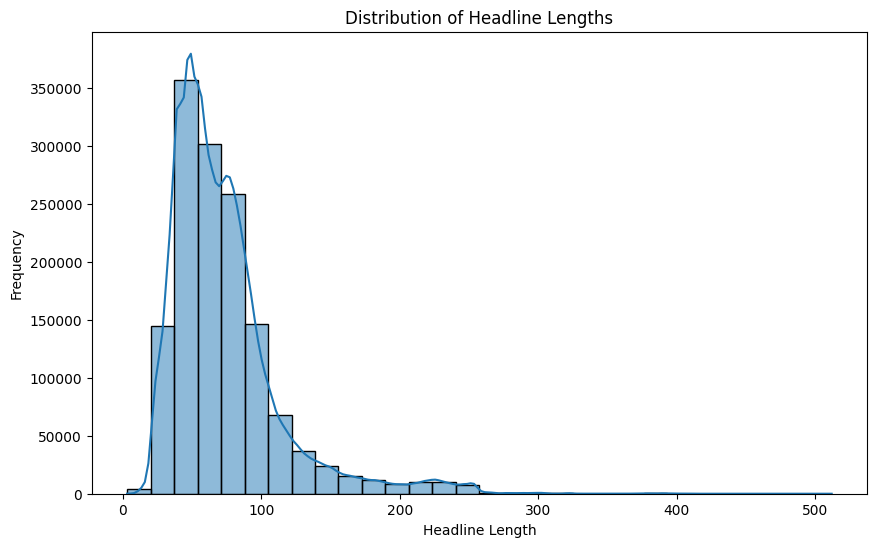

In [10]:
# Plot the distribution of headline lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

Summary of the Distribution Plot:

According to the descriptive statistics and distribution plot above, we can conclude that the distribution is heavily skewed to the right. This indicates that most headlines are relatively short, while a smaller number of headlines are significantly longer.

The peak of the distribution is around 50-70 characters, indicating that this is the most common headline length.

In summary, the distribution of headline lengths is right-skewed with a peak around 50-70 characters and a long tail extending towards longer headlines. Most headlines are relatively short, but a few are significantly longer.

In [11]:
print("Top Publishers:")
publisher_counts = da.articles_per_publisher(df).reset_index(name="no_of_articles")
top_publisher = publisher_counts.head(10)
top_publisher

Top Publishers:


,publisher,no_of_articles
0,Paul Quintaro,228373
1,Lisa Levin,186979
2,Benzinga Newsdesk,150484
3,Charles Gross,96732
4,Monica Gerson,82380
5,Eddie Staley,57254
6,Hal Lindon,49047
7,ETF Professor,28489
8,Juan Lopez,28438
9,Benzinga Staff,28114


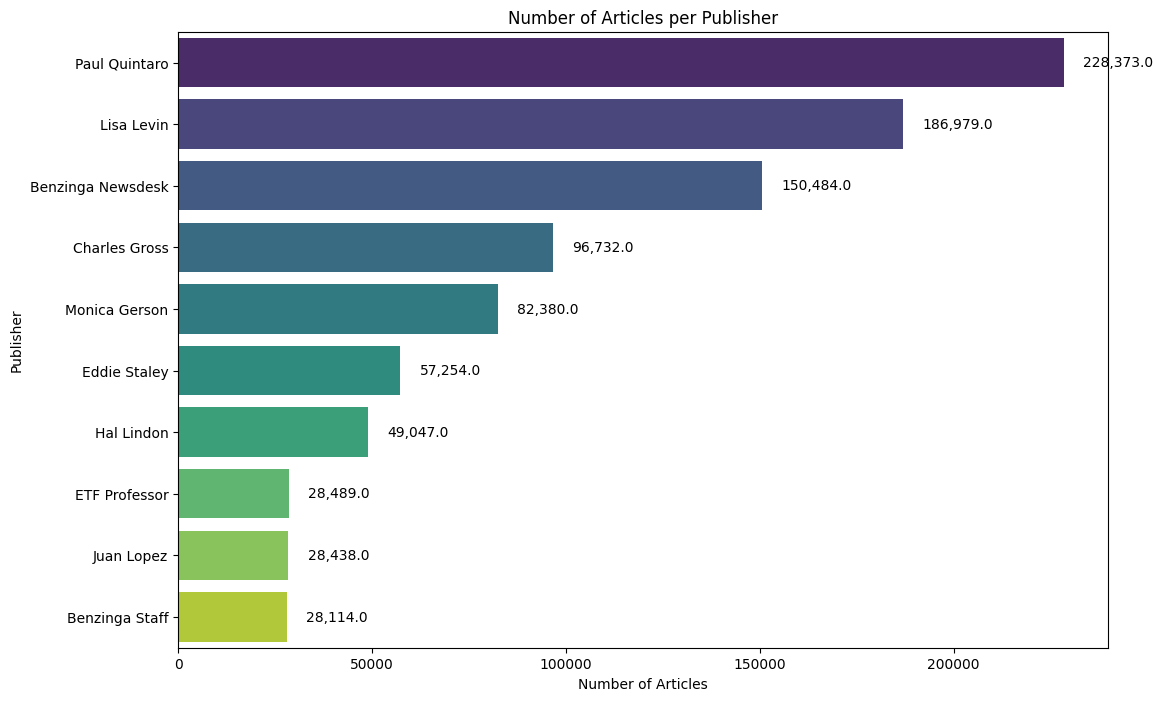

In [12]:
# Plot the number of articles per publisher
# Plot the data
fig, ax = plt.subplots(figsize=(12, 8))
bars = sns.barplot(x='no_of_articles', y='publisher', 
                   data=top_publisher, 
                   palette='viridis',
                   hue='publisher',
                   ax=ax)

# Add exact numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    label = f'{width:,}'
    ax.text(width + 5000, bar.get_y() + bar.get_height() / 2, label,
            ha='left', va='center', color='black', fontsize=10)

plt.title('Number of Articles per Publisher')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.show()

Summary of Most Active Publishers

Paul Quintaro is the most active publisher with 228,373 articles.
Lisa Levin follows with 186,978 articles.
Benzinga Newsdesk has 150,484 articles, making it the third most active.
Charles Gross and Monica Gerson are also highly active, with 96,732 and 82,380 articles, respectively.
Eddie Staley, Hal Lindon, ETF Professor, Juan Lopez, and Benzinga Staff are notable contributors, each publishing between 28,114 and 57,254 articles.

In [13]:
# Articles by day of weeks
articles_by_day = da.articles_by_day_of_week(df).reset_index(name='no_of_articles')
articles_by_day

,day_of_week,no_of_articles
0,Thursday,302619
1,Wednesday,300922
2,Tuesday,296505
3,Monday,265139
4,Friday,217918
5,Sunday,16466
6,Saturday,7759


## Analyze and identify unique emails

In [14]:
# identify unique emails
unique_domains = da.identify_unique_domains(df)
unique_domains.reset_index(drop=True)

,domain,count
0,benzinga.com,7937
1,gmail.com,139
2,andyswan.com,5
3,investdiva.com,2
4,tothetick.com,2
5,eosdetroit.io,1
6,forextraininggroup.com,1
7,stockmetrix.net,1


The domain benzinga.com is the most prominent, contributing a significant majority of the articles (7,937). This suggests that Benzinga is a major source of news in stock news.

gmail.com appears relatively frequently with 139 occurrences. This likely represents individual contributors or less formal sources.

Text Analysis(Sentiment analysis & Topic Modeling)

In [18]:
from sentiment_analysis import SentimentAnalyzer as sa

# Perform sentiment analysis on headline
sentiment_df = sa.analyze_sentiment(df['headline'])

# Apply sentiment categories (Positive, Neutral, Negative)
sentiment_df = sa.apply_sentiment_categories(sentiment_df)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [19]:
sentiment_df.head()

,headline,neg,neu,pos,compound,Sentiment
0,Stocks That Hit 52-Week Highs On Friday,0.0,1.000,0.000,0.000,Neutral
1,Stocks That Hit 52-Week Highs On Wednesday,0.0,1.000,0.000,0.000,Neutral
2,71 Biggest Movers From Friday,0.0,1.000,0.000,0.000,Neutral
3,46 Stocks Moving In Friday's Mid-Day Session,0.0,1.000,0.000,0.000,Neutral
4,B of A Securities Maintains Neutral on Agilent...,0.0,0.833,0.167,0.296,Positive


In [20]:
empty_headlines = sentiment_df[sentiment_df['headline'] == '']
print(f"Number of empty headlines: {len(empty_headlines)}")

Number of empty headlines: 0


In [21]:
missing_after_sentiment = sentiment_df[sentiment_df['headline'].isna()]
print(f"Number of missing headlines after sentiment analysis: {len(missing_after_sentiment)}")

Number of missing headlines after sentiment analysis: 6509


In [22]:
# Find rows with NaN in cleaned_headline
# Check the data types in the 'headline' column
print(sentiment_df['headline'].apply(type).value_counts())

headline
<class 'str'>      1407328
<class 'float'>       6509
Name: count, dtype: int64


In [23]:
# Drop rows where the 'headline' column has float values
sentiment_df = sentiment_df[sentiment_df['headline'].apply(lambda x: not isinstance(x, float))]

Sentiment Distribution of Headlines

Sentiment
Neutral     744222
Positive    439803
Negative    223303
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_25332\329931589.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_text = f'{percentages[i]:.1f}%'


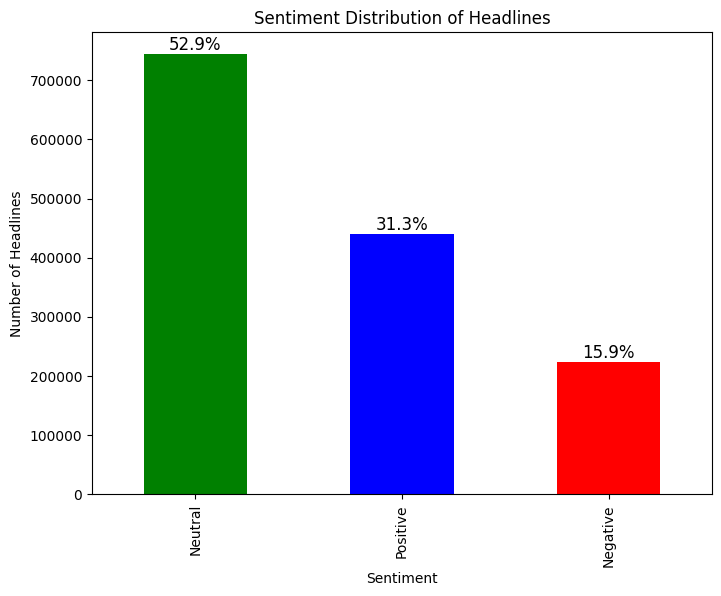

In [24]:
# Summary of sentiment distribution
sentiment_distribution = sentiment_df['Sentiment'].value_counts()
print(sentiment_distribution)

total = sentiment_distribution.sum()  # Calculate the total number of headlines
percentages = (sentiment_distribution / total) * 100  # Calculate percentages

# Optional: Plot the sentiment distribution
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
bars = sentiment_distribution.plot(kind='bar', color=['green', 'blue', 'red'])

# Add percentage annotations on top of each bar
for i, bar in enumerate(bars.patches):
    # Get the height of the bar
    height = bar.get_height()
    # Calculate the percentage and format it
    percentage_text = f'{percentages[i]:.1f}%'
    # Position the text at the end of the bar
    plt.text(bar.get_x() + bar.get_width() / 2, height, percentage_text, 
             ha='center', va='bottom', fontsize=12)

# Set titles and labels
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Headlines')

# Display the plot
plt.show()

The majority of the headlines (52.7%) are neutral in tone, indicating that much of the financial news is factual or balanced without a strong positive or negative bias. A significant portion (31.4%) of the headlines convey a positive sentiment, suggesting that there is a relatively optimistic outlook in the news. Meanwhile, a smaller percentage (15.9%) of the headlines are negative, reflecting less frequent instances of pessimism or unfavorable news.

Overall, the sentiment distribution shows that financial news tends to be more neutral or positive, with fewer headlines expressing negativity. This could be indicative of the media's focus on positive financial developments or the general market conditions during the analyzed period.